In [1]:
import pandas as pd
import numpy as np
import os 
from tqdm import tqdm
import pickle
import re
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append("../")
import src.biblioteca as bb
sys.path.append("../")
import src.soportecleaning as spcl
sys.path.append("../")
import src.soporteCharts as scharts

# Input files

Base data file

In [2]:
with open('../data/pickle/playlist.pickle', 'rb') as base_data:
    base_data = pickle.load(base_data)
print(base_data.shape)
base_data.head(1)

(455057, 11)


,title,rank,date,artist,url,region,chart,trend,streams,week_in_charts,times_in_charts
0,Bad and Boujee (feat. Lil Uzi Vert),1,2017-01-01,Migos,https://open.spotify.com/track/4Km5HrUvYTaSUfi...,United States,top200,SAME_POSITION,1371493.000,429,1


LastFM extraction

In [3]:
with open('../data/pickle/lastfm.pickle', 'rb') as data_lastfm:
    data_lastfm = pickle.load(data_lastfm)
data_lastfm.drop_duplicates(inplace=True)
print(data_lastfm.drop_duplicates().shape)
data_lastfm.head(1)

(14659, 24)


,url,artist,track,artist_0,artist_1,artist_2,published_track,published,summary,content,aritist_genre_0,aritist_genre_1,aritist_genre_2,aritist_genre_3,aritist_genre_4,track_genre_0,track_genre_1,track_genre_2,track_genre_3,track_genre_4,music_genre,gender,birthday_date,age
0,https://open.spotify.com/track/4Km5HrUvYTaSUfi...,migos,bad and boujee (feat. lil uzi vert),migos,None,None,"30 Jan 2018, 04:41","26 Jun 2013, 14:20","Migos is a rap trio-group from Lawrenceville, ...","Migos is a rap trio-group from Lawrenceville, ...",Hip-Hop,trap,rap,hip hop,atlanta,trap,Hip-Hop,rap,2010s,meme rap,hip-hop,group,2013-06-15,9.000


Spotify extraction

In [4]:
with open('../data/pickle/spotify.pickle', 'rb') as data_spotify:
    data_spotify = pickle.load(data_spotify)
data_spotify.drop_duplicates(inplace=True)
print(data_spotify.drop_duplicates().shape)
data_spotify.head(1)

(13992, 22)


,url,artist,track,popu,date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,https://open.spotify.com/track/4Km5HrUvYTaSUfi...,migos,bad and boujee (feat. lil uzi vert),76,2017-01-27,0.926,0.666,11.000,-5.314,1.000,0.244,0.061,0.000,0.123,0.168,127.079,audio_features,0M9ydKzuF3oZTfYYPfaGX1,https://api.spotify.com/v1/tracks/0M9ydKzuF3oZ...,https://api.spotify.com/v1/audio-analysis/0M9y...,343150.000,4.000


# Merging all data

In [5]:
df = base_data.merge(data_lastfm, on = 'url', indicator = True, how = 'left')
df.value_counts('_merge')

_merge
both          456306
left_only          0
right_only         0
Name: count, dtype: int64

In [6]:
df.drop(['_merge'], axis = 1, inplace = True)
df = df.merge(data_spotify, on = 'url', indicator = True, how = 'left')
df.value_counts('_merge')

_merge
both          444929
left_only      13875
right_only         0
Name: count, dtype: int64

In [7]:
df.drop(['artist_y', 'track_x', 'artist', 'track_y', '_merge'], axis = 1, inplace= True)
df.rename({'artist_x':'artist', 'date_x':'playlist_date', 'date_y':'release_date'}, inplace=True, axis=1)
print(df.shape)
df.head(1)

(458804, 51)


,title,rank,playlist_date,artist,url,region,chart,trend,streams,week_in_charts,times_in_charts,artist_0,artist_1,artist_2,published_track,published,summary,content,aritist_genre_0,aritist_genre_1,aritist_genre_2,aritist_genre_3,aritist_genre_4,track_genre_0,track_genre_1,track_genre_2,track_genre_3,track_genre_4,music_genre,gender,birthday_date,age,popu,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,Bad and Boujee (feat. Lil Uzi Vert),1,2017-01-01,Migos,https://open.spotify.com/track/4Km5HrUvYTaSUfi...,United States,top200,SAME_POSITION,1371493.000,429,1,migos,None,None,"30 Jan 2018, 04:41","26 Jun 2013, 14:20","Migos is a rap trio-group from Lawrenceville, ...","Migos is a rap trio-group from Lawrenceville, ...",Hip-Hop,trap,rap,hip hop,atlanta,trap,Hip-Hop,rap,2010s,meme rap,hip-hop,group,2013-06-15,9.000,76,2017-01-27,0.926,0.666,11.000,-5.314,1.000,0.244,0.061,0.000,0.123,0.168,127.079,audio_features,0M9ydKzuF3oZTfYYPfaGX1,https://api.spotify.com/v1/tracks/0M9ydKzuF3oZ...,https://api.spotify.com/v1/audio-analysis/0M9y...,343150.000,4.000


In [8]:
df['month'] = df['playlist_date'].dt.month
df['year'] = df['playlist_date'].dt.year
df['date'] = df['year'].astype(str) + '-' + df['month'].astype(str)

In [9]:
df.head(1)

,title,rank,playlist_date,artist,url,region,chart,trend,streams,week_in_charts,times_in_charts,artist_0,artist_1,artist_2,published_track,published,summary,content,aritist_genre_0,aritist_genre_1,aritist_genre_2,aritist_genre_3,aritist_genre_4,track_genre_0,track_genre_1,track_genre_2,track_genre_3,track_genre_4,music_genre,gender,birthday_date,age,popu,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,month,year,date
0,Bad and Boujee (feat. Lil Uzi Vert),1,2017-01-01,Migos,https://open.spotify.com/track/4Km5HrUvYTaSUfi...,United States,top200,SAME_POSITION,1371493.000,429,1,migos,None,None,"30 Jan 2018, 04:41","26 Jun 2013, 14:20","Migos is a rap trio-group from Lawrenceville, ...","Migos is a rap trio-group from Lawrenceville, ...",Hip-Hop,trap,rap,hip hop,atlanta,trap,Hip-Hop,rap,2010s,meme rap,hip-hop,group,2013-06-15,9.000,76,2017-01-27,0.926,0.666,11.000,-5.314,1.000,0.244,0.061,0.000,0.123,0.168,127.079,audio_features,0M9ydKzuF3oZTfYYPfaGX1,https://api.spotify.com/v1/tracks/0M9ydKzuF3oZ...,https://api.spotify.com/v1/audio-analysis/0M9y...,343150.000,4.000,1,2017,2017-1


In [10]:
df['key_mapped'] = df['key'].replace(bb.dict_keys)
df['mode_mapped'] = df['mode'].replace(bb.dict_scale)

# Questions / hypothesis

Firstly, both of the playlist will be splitted in different dataframes.

In [11]:
top200 = df[df['chart'] == 'top200']
viral50 = df[df['chart'] == 'viral50']

Once splitted, we will look at the parameters:
- `valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- `danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- `energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

And evaluate if there have been significant changes on this variables.

## General view from both playlists

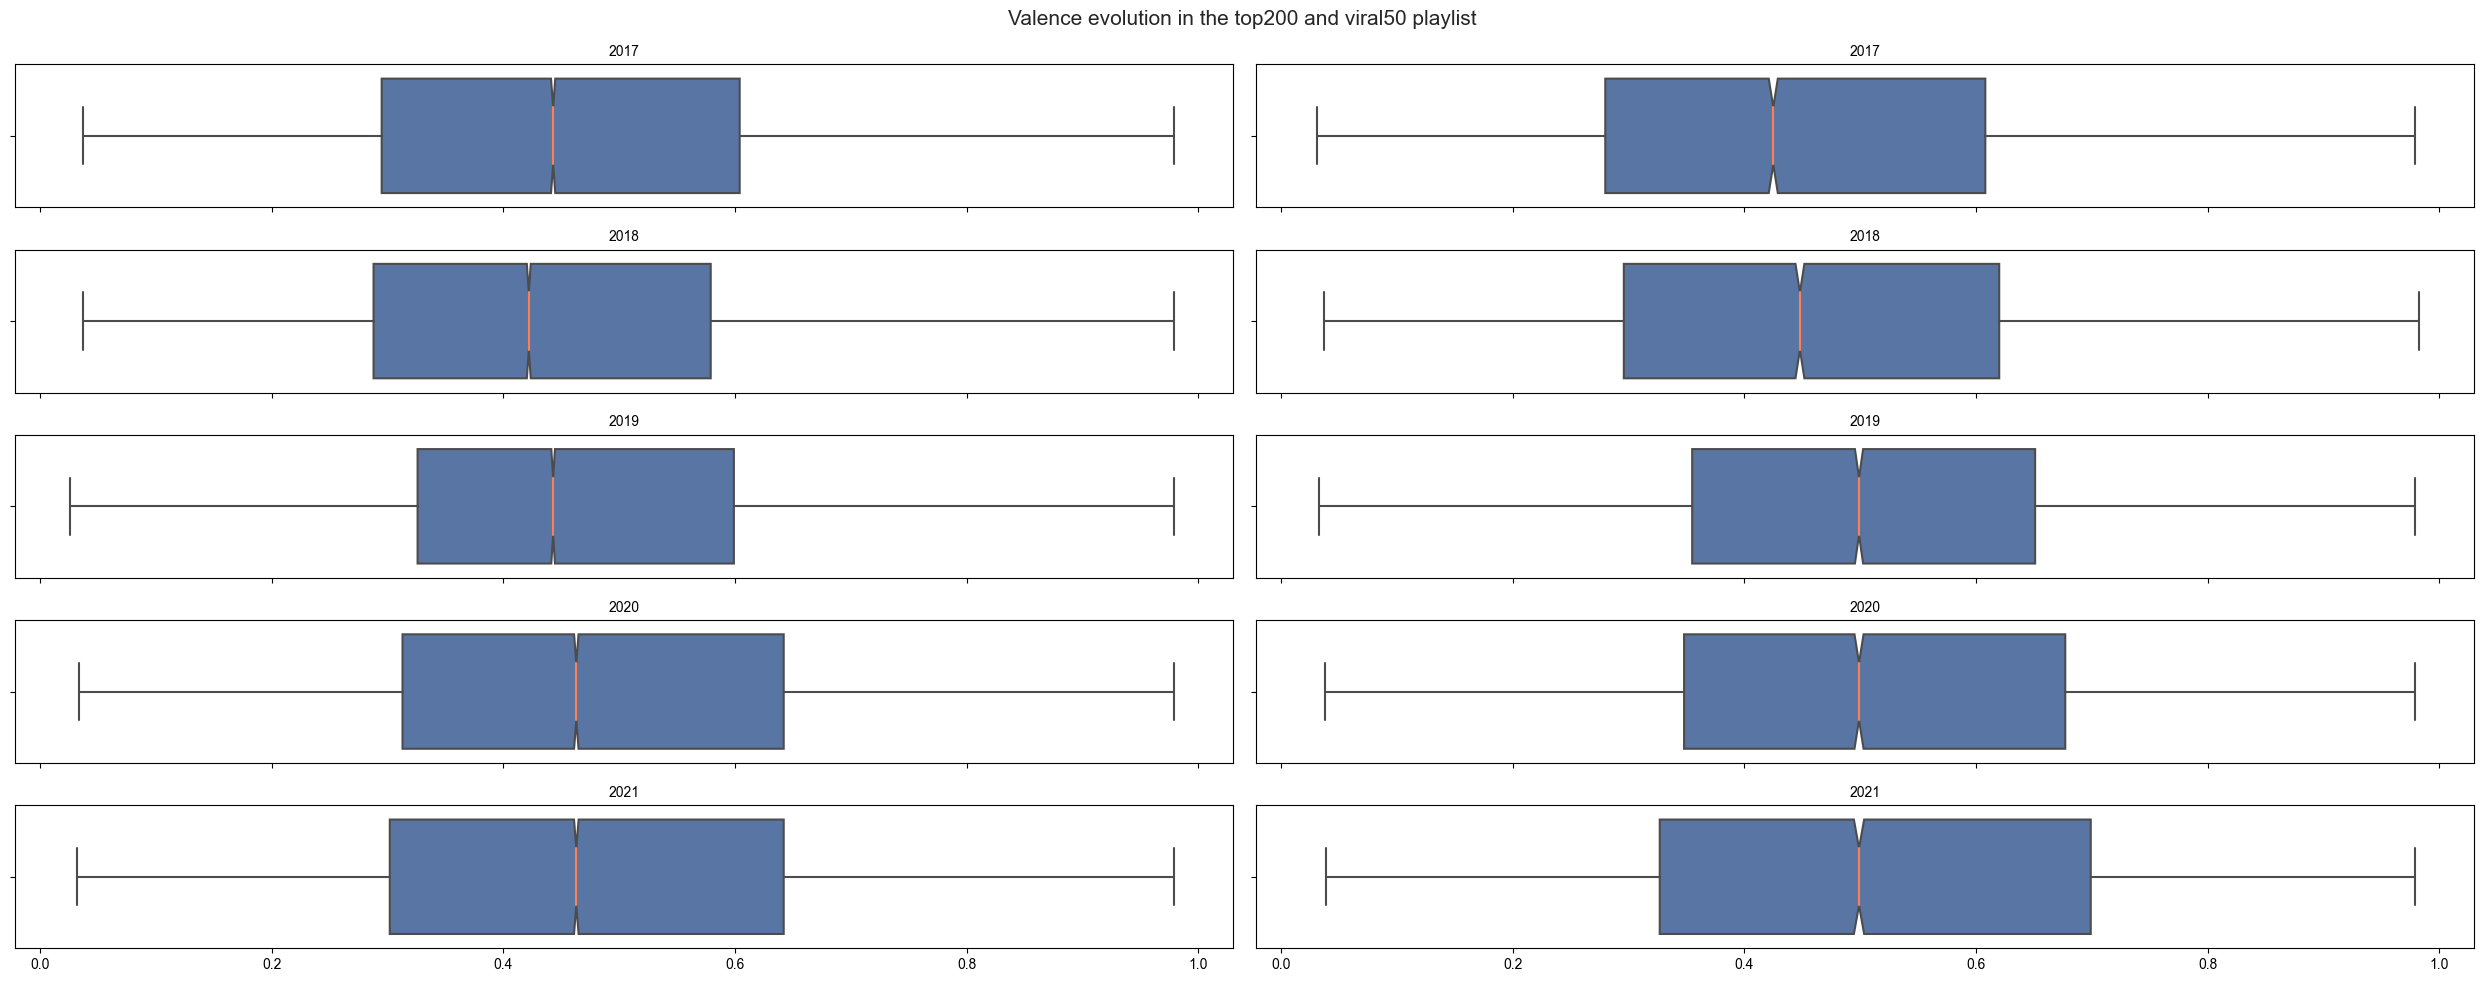

In [12]:
scharts.general_chart(top200, viral50)

Since 2019 seems to be a soft increase in the `valence` value. What about the `energy` and `danceability`? 

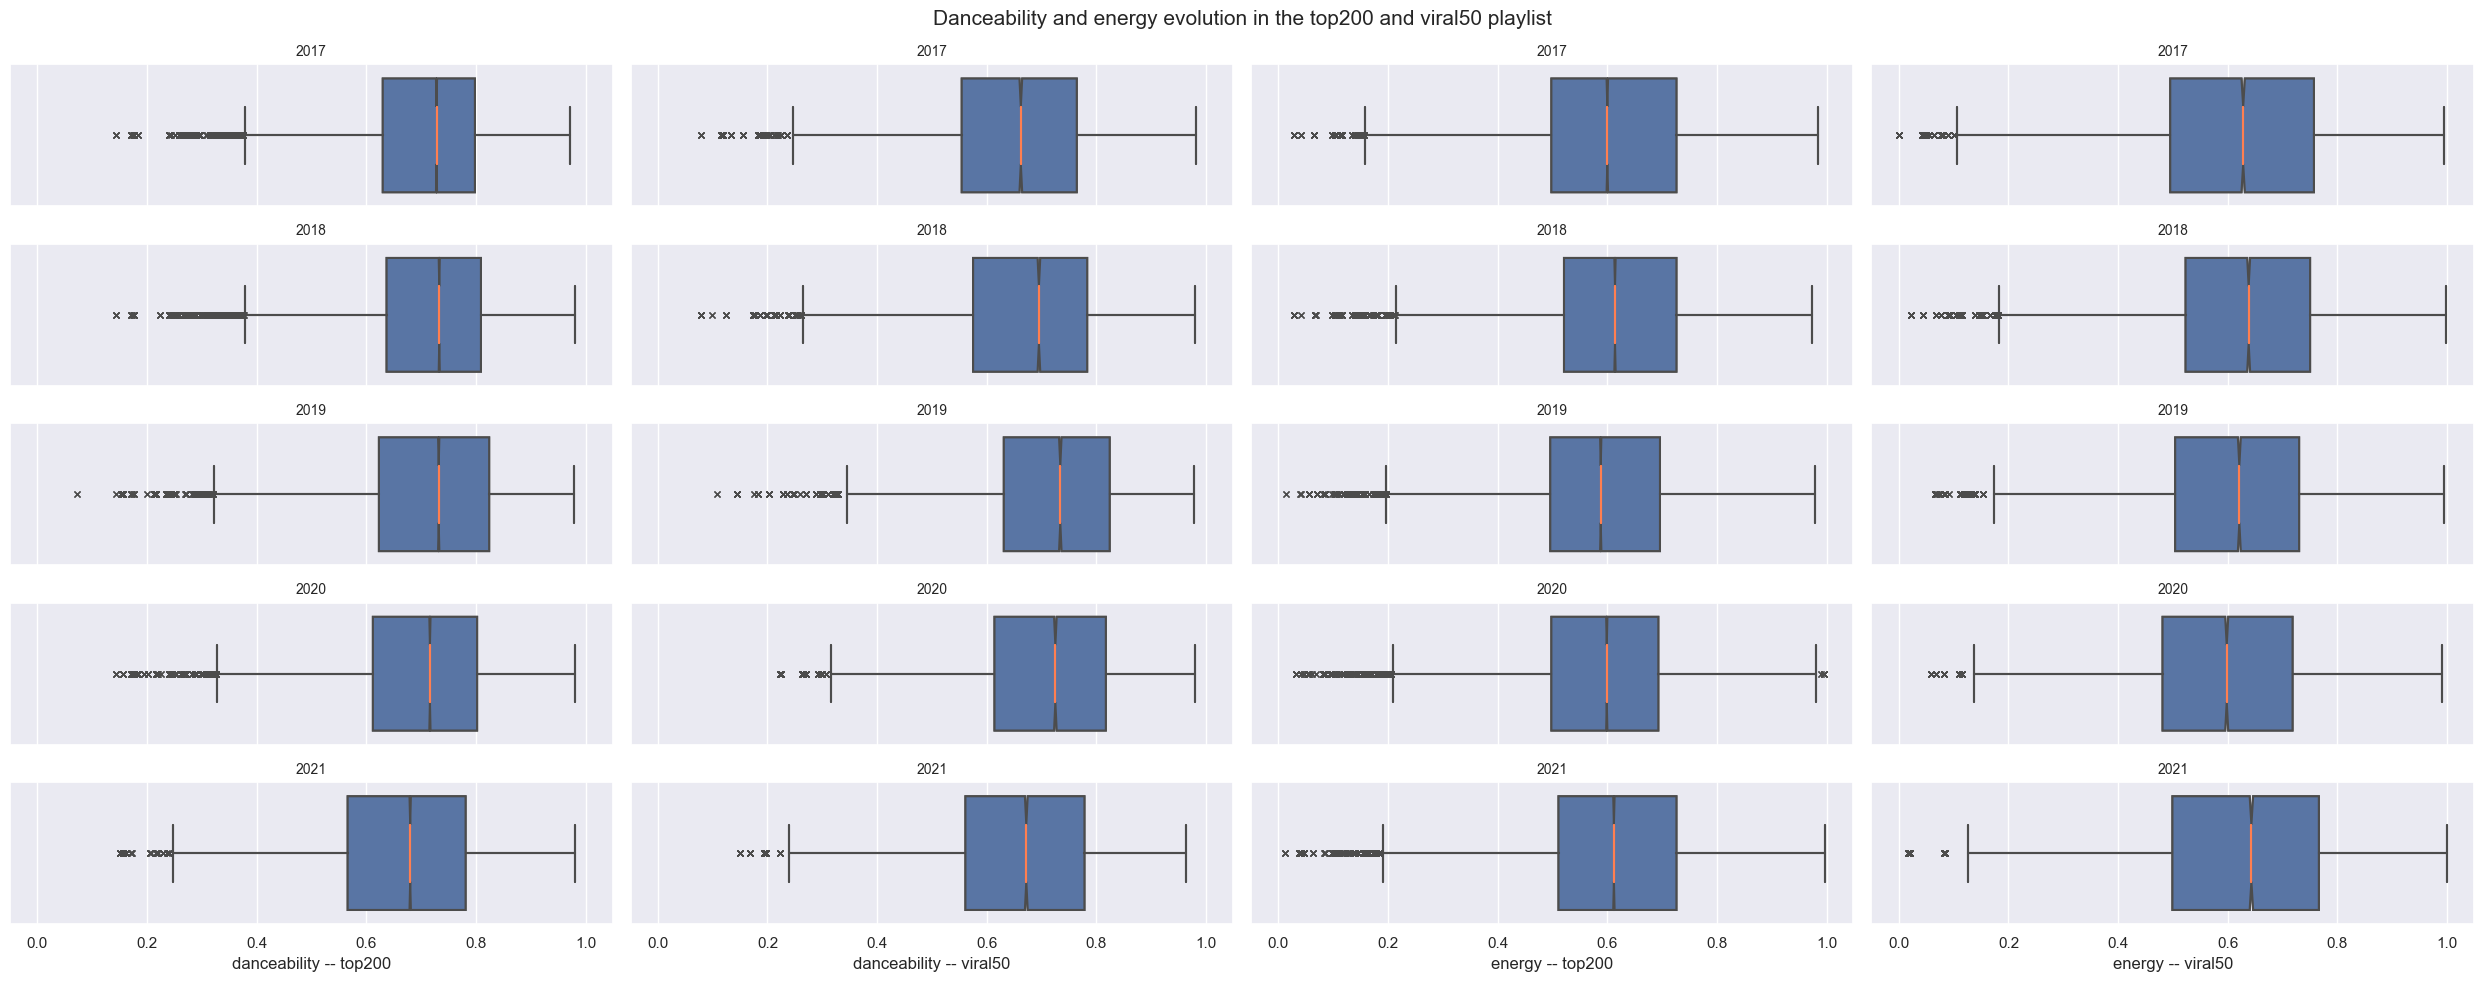

In [13]:
scharts.general_chart_energy_danceability(top200, viral50)

These charts combine the `danceability` and `energy` evolution on both playlist during the given peiod. 

The `danceability` seems to have decreased on 2020 on both playlist. The `energy` value remains the same after 2020.

## Top music genres

Now we will explored the top streamed music genders and see how the variables evolved during the given period.

In [14]:
top5_musicgenre = df.groupby(['music_genre'])['streams'].sum().reset_index().sort_values(by = 'streams', ascending = False).head(5)
top5_musicgenre['ratio'] = top5_musicgenre['streams'] * 100 / (df[~df['streams'].isnull()]['streams'].sum())
top5_musicgenre

,music_genre,streams,ratio
9,hip-hop,57273864611.000,39.909
17,pop,24813720044.000,17.290
18,rap,10241827649.000,7.137
25,trap,9038507811.000,6.298
20,rnb,7881291347.000,5.492


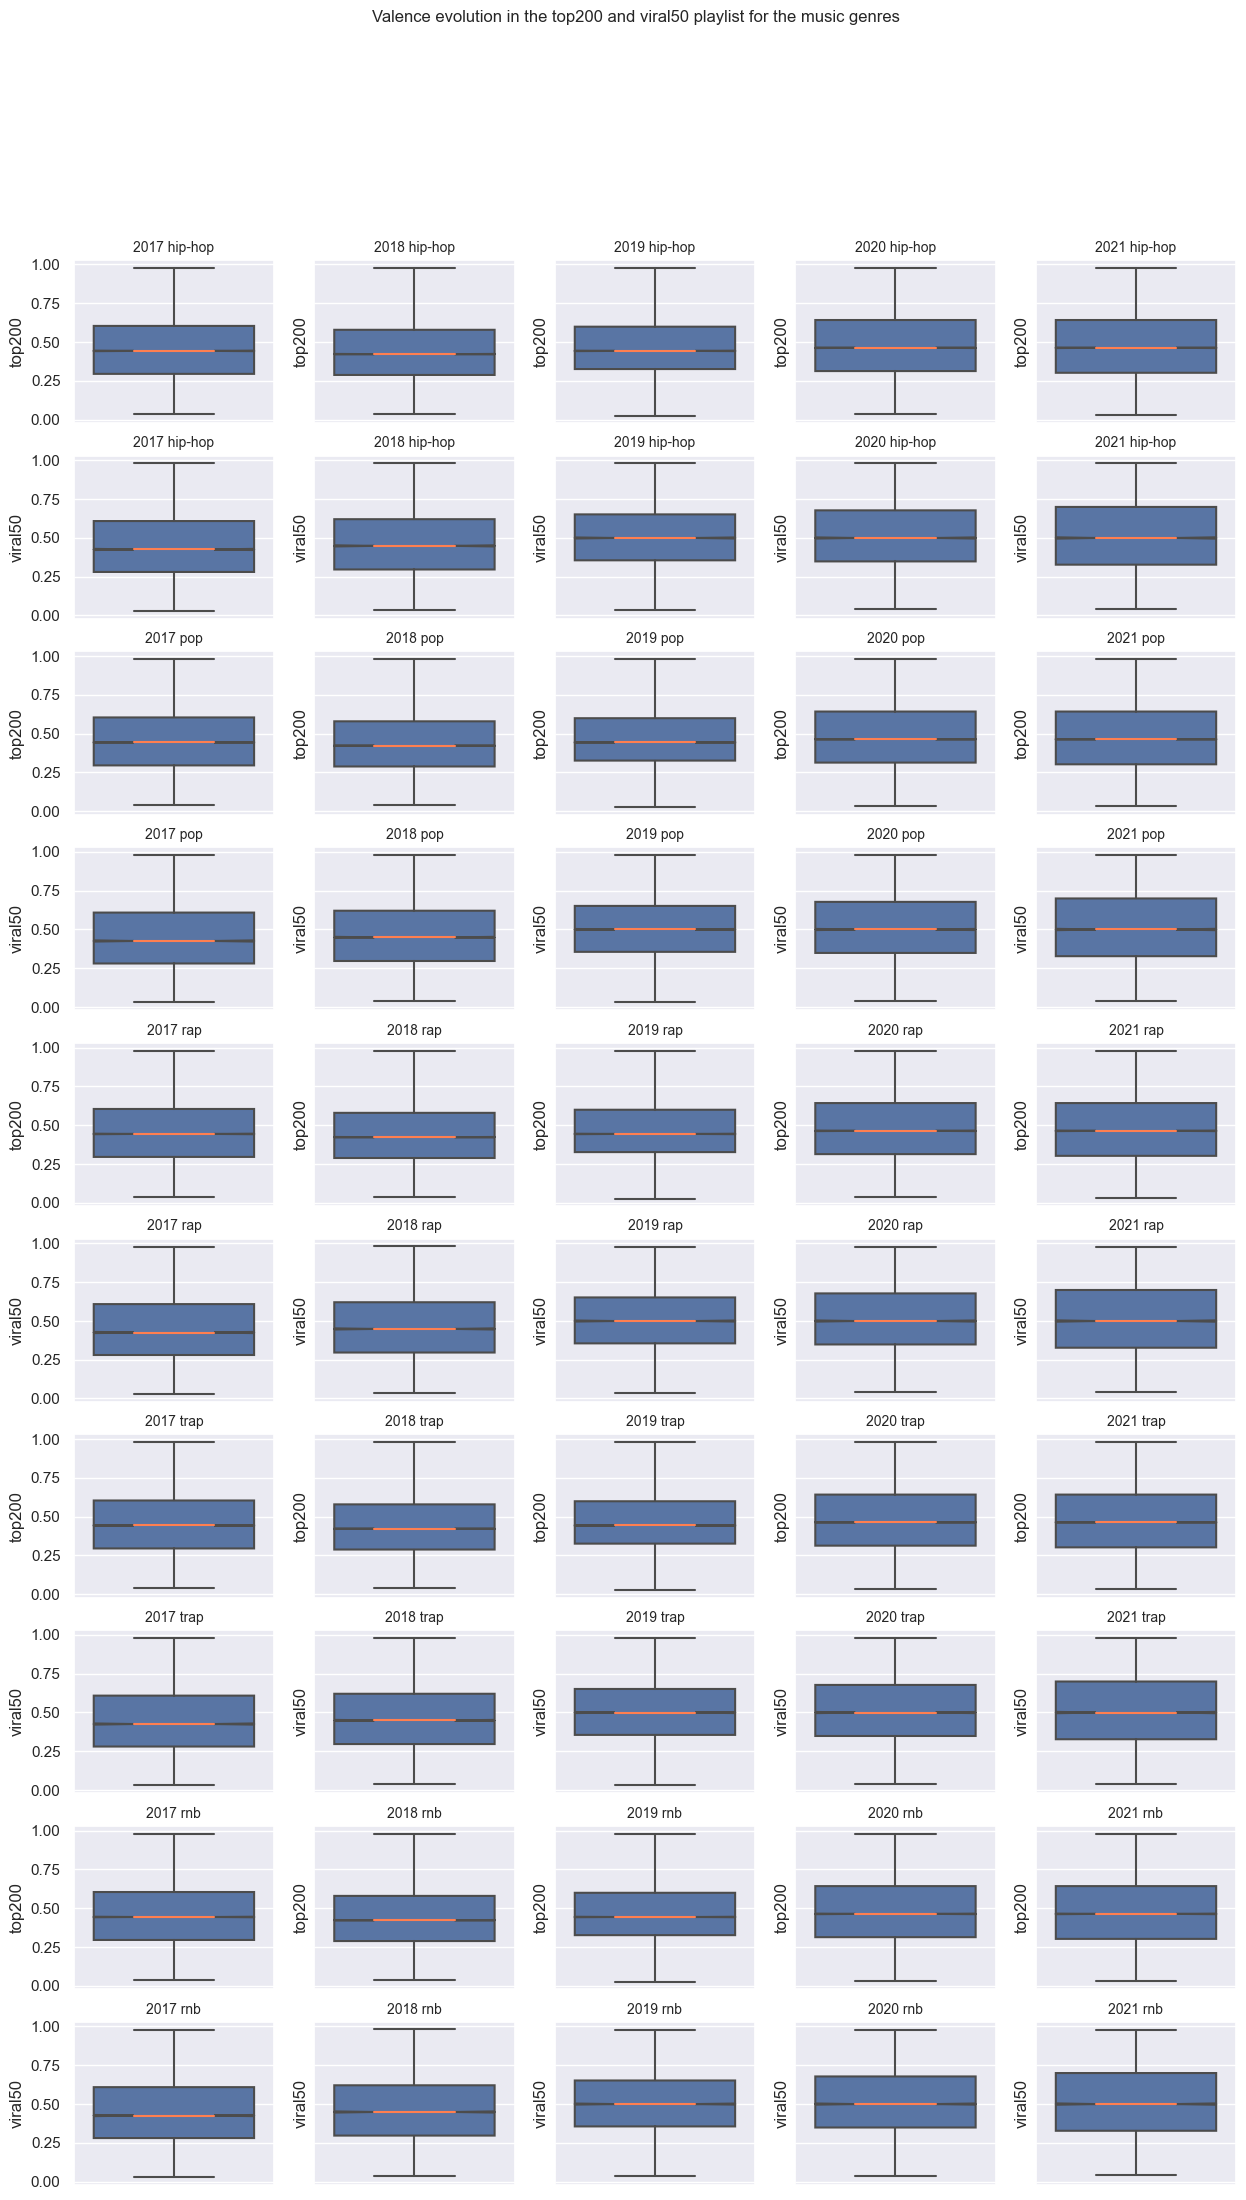

In [15]:
scharts.valence_music_genre(top200, viral50, top5_musicgenre)

In general, all music genres seem to have an increase in `valence`. The top200 playlist seemss to have a softer increase than the viral50 one.

Let's see how the `energy` and `danceability` relate.

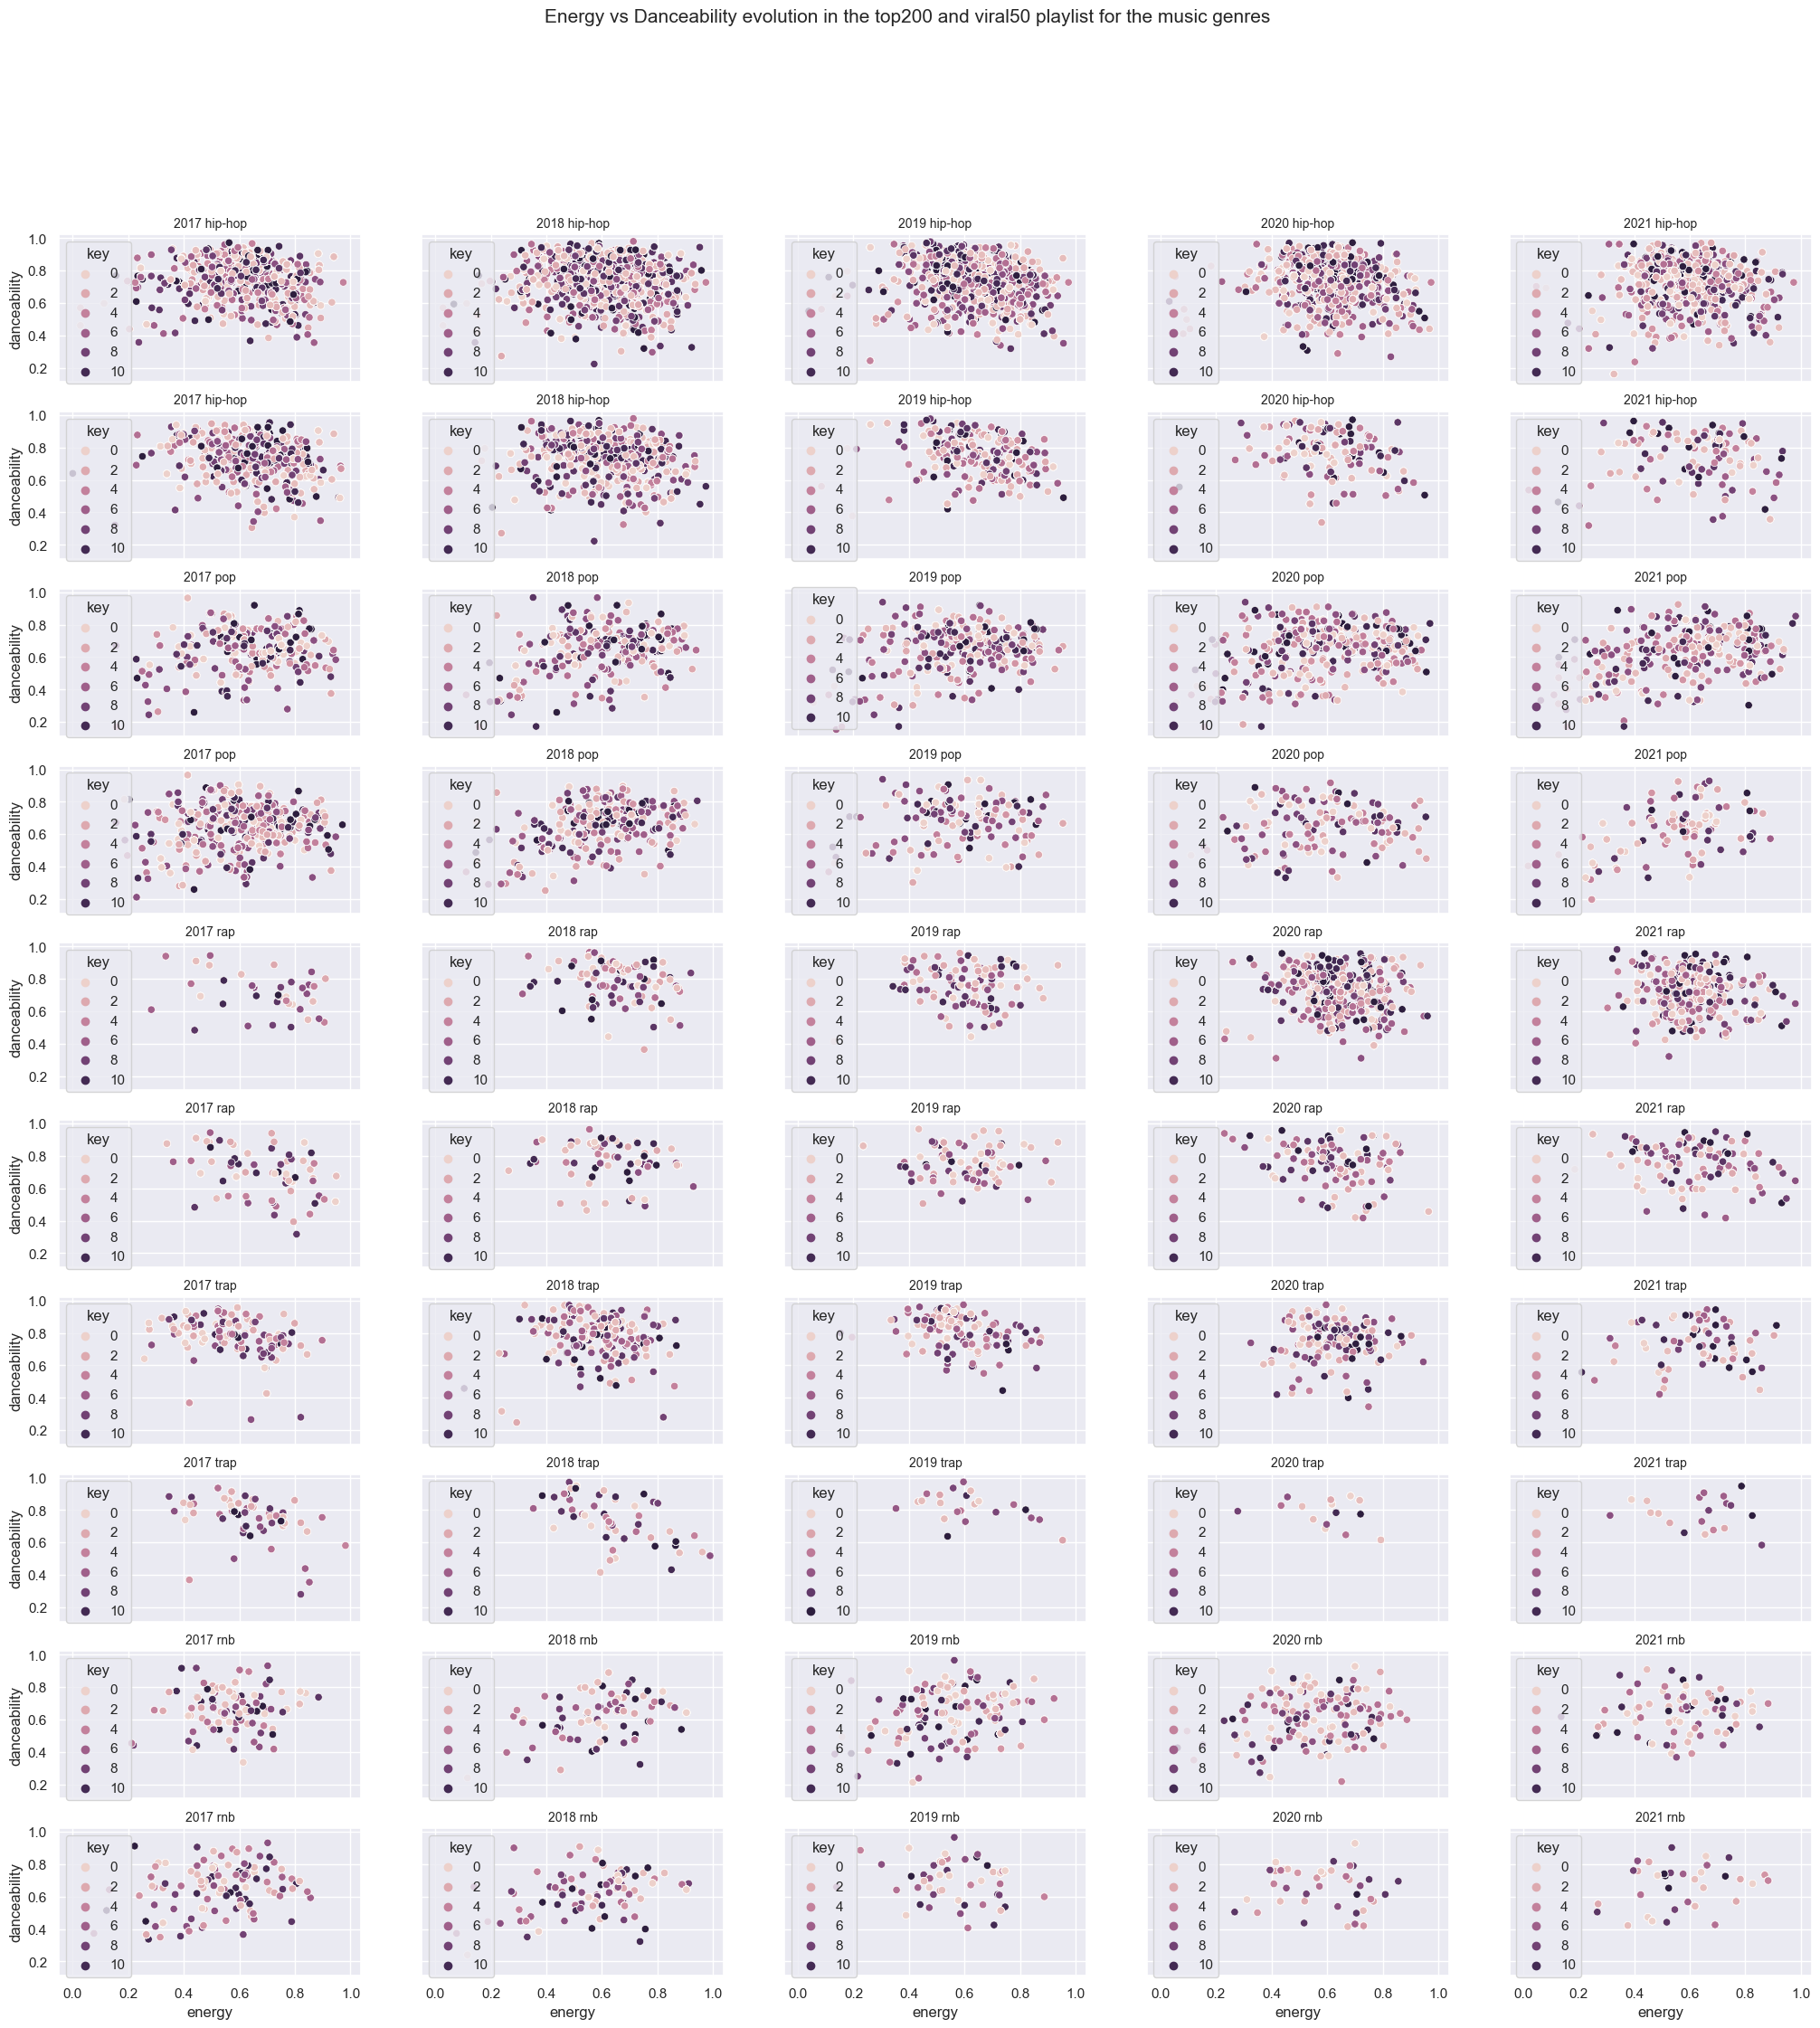

In [16]:
scharts.energy_danceability_music_genre(top200, viral50, top5_musicgenre)

Each music genre has a different `daceability` / `energy` distribution. 

- `hip-hop`: each year, most of the songs have a high `daceability` but the `energy` value varies. There seems to be a decrease of `hip-hop` songs in the last years.
- `pop`: the `danceability` and `energy` have weak correlation in this music genre. 
- `rap`: each year, most of the songs have a high `daceability` but the `energy` value varies. There seems to be an increase of `rap` songs in the last years.
- `trap`: each year, most of the songs have a hight `danceability` and high `energy` value. There seems to be a reduction on songs labeled as `trap`.
- `rnb`: the songs seem to have less correlation between the `energy` and `danceability` values. There seems to be also a reduction on songs labeled as `rnb` on the playlists.

## Data for artist based on their gender

Let's see if there's a significant change on the values of `danceability`, `energy` and `valence` based on the artist's gender or if the artist is a group. 

In [18]:
gender_top200 = top200.groupby(['gender', 'year', 'month', 'date'])['valence', 'energy', 'danceability'].median().reset_index().sort_values(by=['year', 'month'], ascending = True)
gender_viral50 = viral50.groupby(['gender', 'year', 'month', 'date'])['valence', 'energy', 'danceability'].median().reset_index().sort_values(by=['year', 'month'], ascending = True)

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

NameError: name 'gender_top200' is not defined

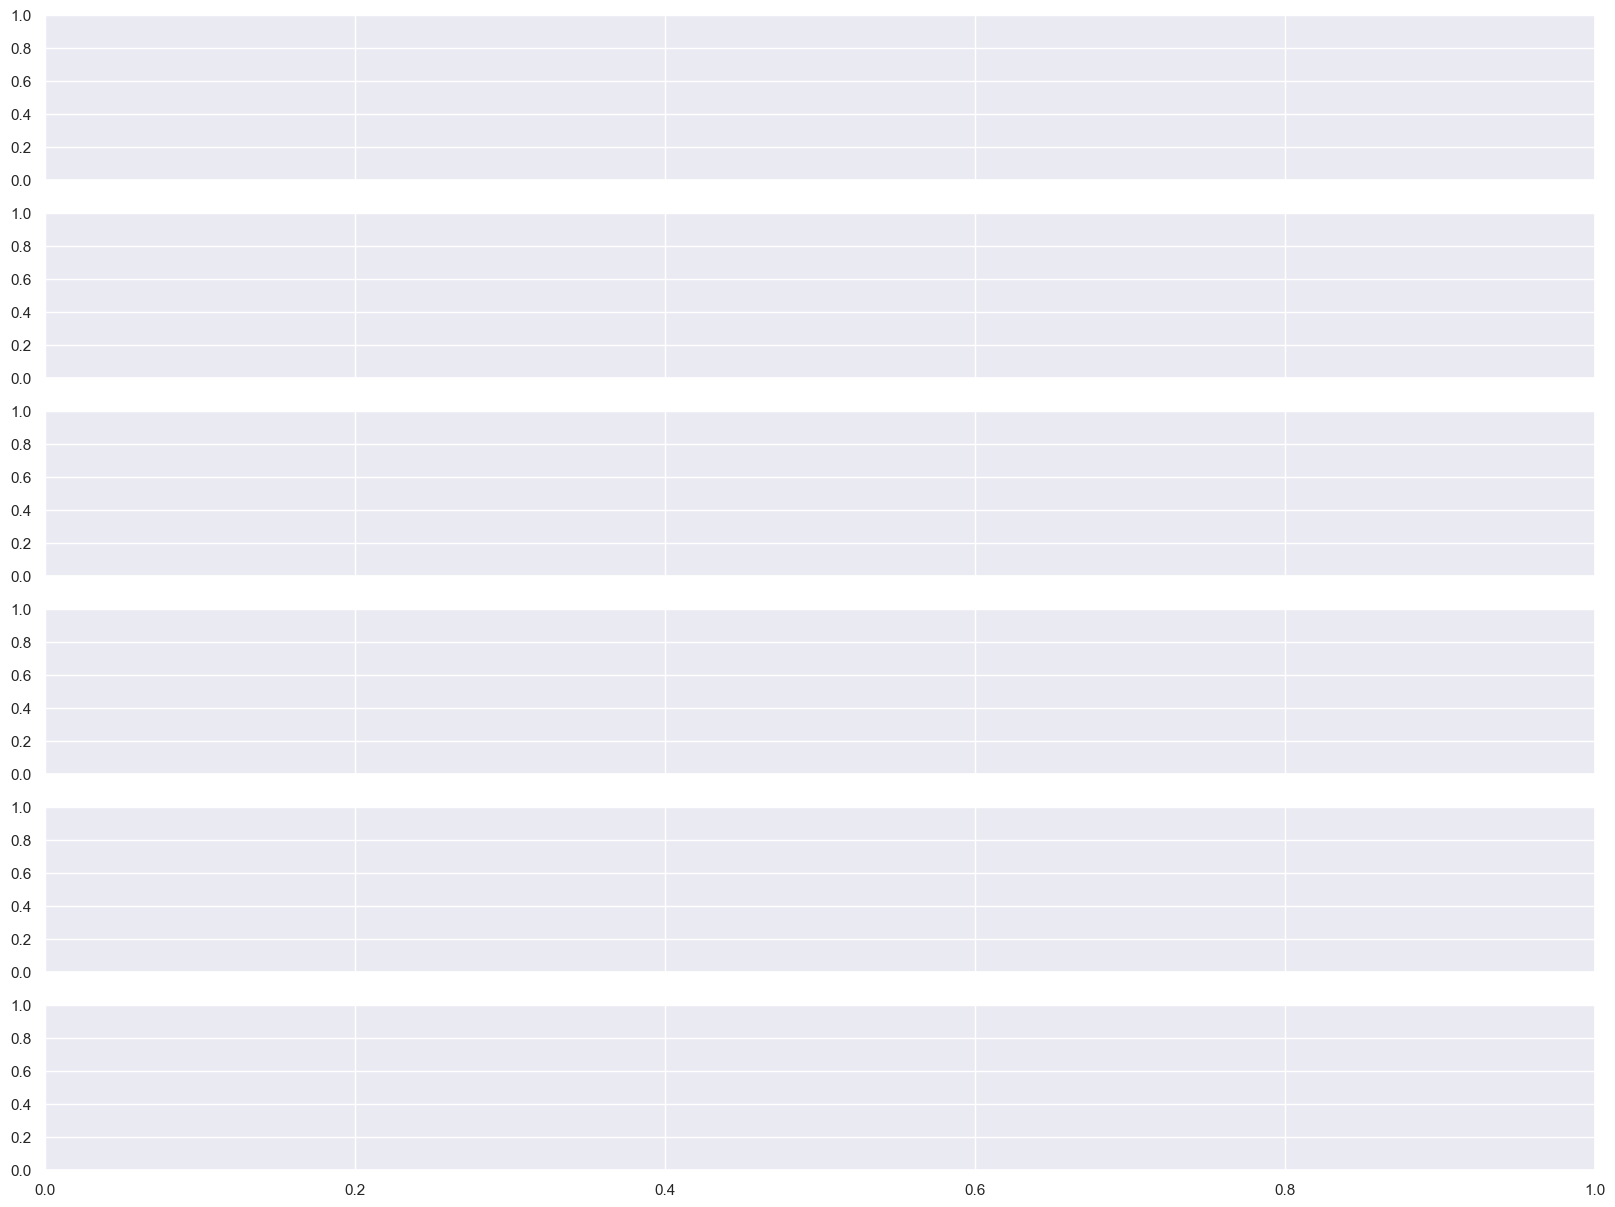

In [19]:
sns.set_theme(style="darkgrid")
#sns.set(rc={"figure.figsize":(25,10)})
fig, axs = plt.subplots(ncols=1, nrows = 6, figsize = (20, 15), sharex = True)
values = [val for val in ['valence', 'energy', 'danceability'] for _ in (0, 1)]
palette = {
    'female': '#d7191c',
    'group': '#66c2a5',
    'non-binary': '#fdae61',
    'male': '#2b83ba'
}
for row, value in zip(list(range(0,6)), values):
    if row % 2 == 0:
        sns.lineplot(x='date', y=value, hue='gender',  data=gender_top200, ax=axs[row], palette=palette)
        axs[row].set_title('top200')
        axs[row].axvline('2020-1', 0, 1, linestyle='dashed')
    elif row % 2 != 0:
        sns.lineplot(x='date', y=value, hue='gender',  data=gender_viral50 , ax=axs[row], palette=palette)
        axs[row].set_title('viral50')        
        axs[row].axvline('2020-1', 0, 1, linestyle='dashed')
        plt.xticks(rotation = 90);

In any case, we don't see any visible change after january 2020.

## Top artist analysis

Let's see if there is a change on the `valence`, `danceability` or the `energy` for the top 5 most streamed artist.

In [25]:
top5_artist = df.groupby(['artist'])['streams'].sum().reset_index().sort_values(by = 'streams', ascending = False).head(5)
top5_artist['ratio'] = top5_artist['streams'] * 100 / (df[~df['streams'].isnull()]['streams'].sum())
top5_artist

,artist,streams,ratio
3638,Post Malone,4966682478.000,3.461
1293,Drake,4697961521.000,3.274
2273,Juice WRLD,4400300033.000,3.066
4923,XXXTENTACION,3436491646.000,2.395
587,Billie Eilish,2892423843.000,2.015


In [26]:
artist_top200 = top200[top200['artist'].isin(top5_artist['artist'].tolist())].groupby(['artist', 'year', 'month', 'date'])['valence', 'energy', 'danceability'].median().reset_index().sort_values(by=['year', 'month'], ascending = True)
artist_viral50 = viral50[viral50['artist'].isin(top5_artist['artist'].tolist())].groupby(['artist', 'year', 'month', 'date'])['valence', 'energy', 'danceability'].median().reset_index().sort_values(by=['year', 'month'], ascending = True)

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [27]:
def music_lineplot(df, playlist_input, top_music, variable = 'valence'):
    sns.set_theme(style="darkgrid", font_scale=0.75)
    #valence = df[df['chart'] == playlist_input].groupby(['date'])[['valence', 'energy', 'danceability']].mean().reset_index()
    df_playlist = df[df['chart'] == playlist_input]
    df_filtered = df_playlist[(df_playlist['music_genre'].isin(top_music))].groupby(['date', 'music_genre'])[variable].mean().reset_index()
    
    sns.lineplot(data = df_filtered, x = 'date', y = variable, hue='music_genre', palette='flare')
    plt.xlabel('')
    plt.ylim(0,1)
    plt.axvline('2020-1', 0, 1, linestyle='dashed')
    plt.text('2020-1', 1, 'covid-19 pandemic', horizontalalignment='left', size='medium', color='black', weight='semibold')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.savefig(f'imagenes/lineplot_genre_{variable}.png')

FileNotFoundError: [Errno 2] No such file or directory: 'imagenes/lineplot_genre_valence.png'

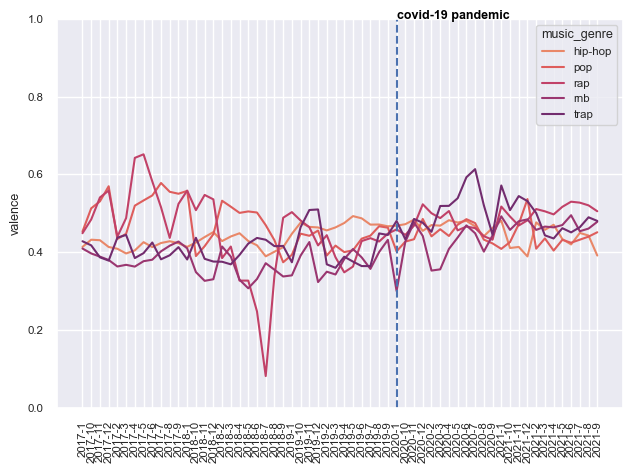

In [28]:
music_lineplot(df, 'top200', top5_musicgenre['music_genre'].tolist(), 'valence')

In [ ]:
sns.set_theme(style="darkgrid")
#sns.set(rc={"figure.figsize":(25,10)})
fig, axs = plt.subplots(ncols=1, nrows = 6, figsize = (20, 15), sharex = True)
values = [val for val in ['valence', 'energy', 'danceability'] for _ in (0, 1)]
palette = {
    top5_artist['artist'].tolist()[0]: '#d7191c',
    top5_artist['artist'].tolist()[1]: '#fdae61',
    top5_artist['artist'].tolist()[2]: '#fee08b',
    top5_artist['artist'].tolist()[3]: '#99d594',
    top5_artist['artist'].tolist()[4]: '#2b83ba'
}
for row, value in zip(list(range(0,6)), values):
    if row % 2 == 0:
        sns.lineplot(x='date', y=value, hue="artist",  data=artist_top200, ax=axs[row], palette=palette)
        axs[row].set_title('top200')
        axs[row].axvline('2020-1', 0, 1, linestyle='dashed')
    elif row % 2 != 0:
        sns.lineplot(x='date', y=value, hue="artist",  data=artist_viral50 , ax=axs[row], palette=palette)
        axs[row].set_title('viral50')        
        axs[row].axvline('2020-1', 0, 1, linestyle='dashed')
        plt.xticks(rotation = 90);

Each of the artist had a different evolution during the given period:
- Post Malone: Post Malone's music increases the `valence` value since january 2020. `energy` also increases, but it started before the pandemic. the `danceability` values remain stable. 
- Drake: Drake had a great `valence` rise starting the pandemic, bu after a couple of months decreased. the `energy` remains in a middle level and the `daceability` remains high.
- Juice WRLD: the Juice WRLD `valence` decreased before the pandemic, but since 2020 is on its minimum values. the `energy` and `danceability` remain stable, with relatively high values.
- XXXTENTACION: the `valence`, `energy` and `danceability` remains constant. xxxtentacion died on 2018, so his case is a bit unique, because there are no actual new songs.
- Billie Eilish: the `valence` value for Billie Eilish is generally really low, having a big increase on 2021. the `energy` values are also pretty low since before the pandemic but the `dancebility` decreases hard since 2020.

Only Billie Eilish listeners seem to be affected by the pandemic.

## data by key

In [ ]:
def general_catplot(df, playlist_input, chart_type = 'swarm'):
    df_filtered = df[df['chart'] == playlist_input]#[['playlist_date', column]]#.groupby(['date'])['valence'].mean().reset_index()
    fig, axs = plt.subplots(ncols=1, nrows = len(df['playlist_date'].dt.year.unique().tolist()), figsize = (10, 15), sharex=True,)
    list_years = df_filtered.sort_values(by = ['playlist_date'])['playlist_date'].dt.year.unique().tolist()
    sns.set_theme(style="darkgrid")
    for year in list_years:
        sns.catplot(
            data = df_filtered[df_filtered['playlist_date'].dt.year == year], 
            x = df_filtered[df_filtered['playlist_date'].dt.year == year]['key_mapped'], 
            hue = df_filtered[df_filtered['playlist_date'].dt.year == year]['mode_mapped'],
            ax = axs[list_years.index(year)], palette='flare', kind = chart_type
            )
        axs[list_years.index(year)].set_title(str(year), fontsize=10, )
        axs[list_years.index(year)].set_xlabel("")
    plt.tight_layout()

In [ ]:
top200

In [ ]:
sns.countplot(
    data = top200, 
    x = top200['key_mapped'], 
    hue = top200['mode_mapped'],
    palette='flare'
    )

In [ ]:
sns.histplot(
    top200, x="date", y="key_mapped", stat = 'count', palette='flare'
);

In [ ]:
top200[top200['year'] == 2020]['playlist_date'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(20, 7)})
sns.kdeplot(data=top200, x="playlist_date", hue="key_mapped", multiple="fill", palette = 'pastel')
plt.axvline(pd.to_datetime('2020-01-01'), 0, 1, linestyle='dashed');

In [ ]:
sns.set(rc={'figure.figsize':(20, 7)})
sns.kdeplot(data=top200, x="playlist_date", hue="mode_mapped", multiple="fill", palette='pastel')
plt.axvline(pd.to_datetime('2020-01-01'), 0, 1, linestyle='dashed');